In [2]:
import pandas as pd
import sqlite3

In [3]:
con = sqlite3.connect('../data/checking-logs.sqlite')

• анализируйте только пользователей, а не администраторов
• анализируйте только даты, когда были как просмотры, так и фиксации проверки
• используемый размер шрифта должен быть 8
• размер рисунка равен (15,8)

In [4]:
SQL = ''' select timestamp from checker where uid like 'user%' '''
commits = pd.io.sql.read_sql(SQL, con)
commits = pd.DataFrame(pd.to_datetime(commits['timestamp']).dt.date)
commits.rename(columns={'timestamp':'commits'}, inplace=True)
commits = pd.DataFrame(commits.groupby('commits')['commits'].count())
commits.index.name = 'date'
commits

,commits
date,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


In [5]:
SQL = ''' select datetime from pageviews where uid like 'user%' '''
views = pd.io.sql.read_sql(SQL, con)
views = pd.DataFrame(pd.to_datetime(views['datetime']).dt.date)
views.rename(columns={'datetime':'views'}, inplace=True)
views = pd.DataFrame(views.groupby('views')['views'].count())
views.index.name = 'date'
views

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [6]:
graph = pd.merge(views, commits, on='date')
graph

,views,commits
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


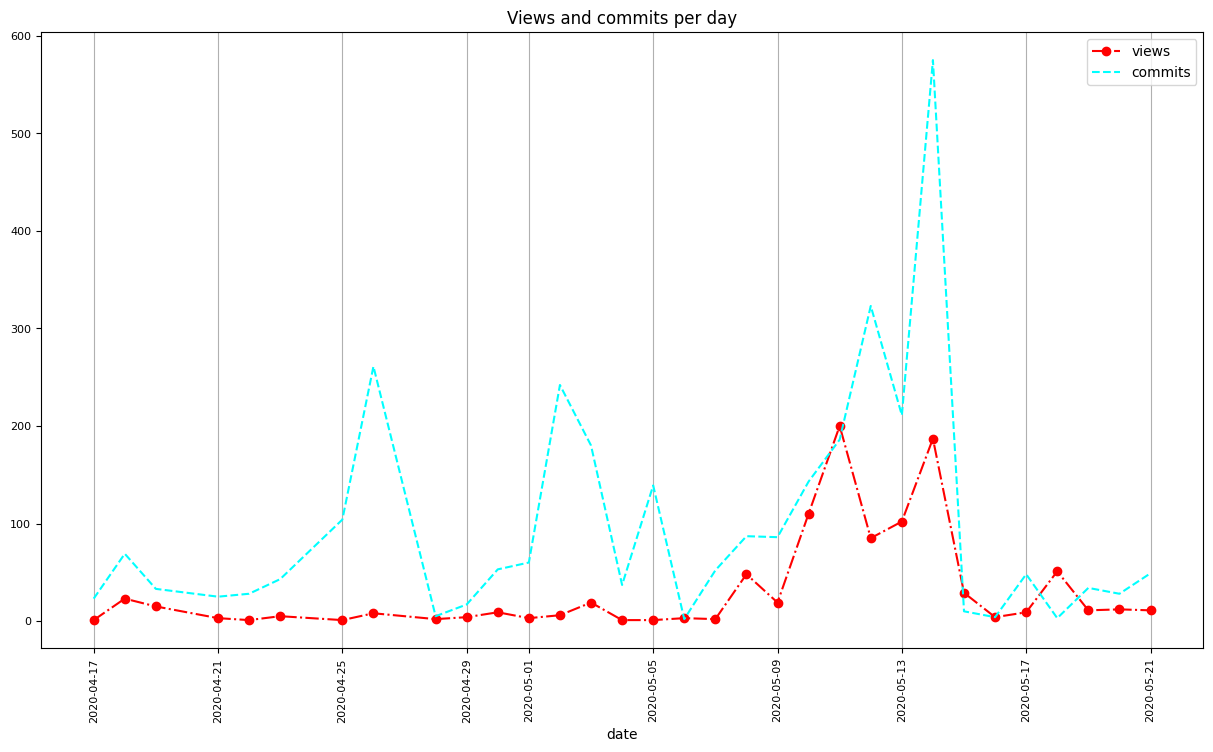

In [7]:
graph.plot(fontsize=8, figsize=(15,8), title='Views and commits per day', rot=90, style=['o-.', '--'], color=['red','aqua']).grid(axis='x')

In [8]:
count = graph[graph['views'] > 150].count()
count = count['views']

In [9]:
from IPython.display import display, Markdown

In [10]:
display(Markdown(f'<h2>“How many times was the number of views larger than 150?”</h2><br>'))
display(Markdown(f'*The answer is* {count}'))

<h2>“How many times was the number of views larger than 150?”</h2><br>

*The answer is* 2

In [11]:
con.close()